In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [52]:
transaction_data = pd.read_csv('datasets/preprocessed_transaction_data.csv')

transaction_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER,origBalanceDiscrepancy,destBalanceDiscrepancy
0,11,427818.23,198219.0,0.00,0.00,427818.23,0,0,229599.23,0.000000e+00
1,20,80828.54,0.0,0.00,5149991.49,5230820.04,0,0,80828.54,-1.000000e-02
2,20,106069.89,301258.0,195188.11,263816.83,369886.72,0,1,0.00,5.820766e-11
3,18,402832.90,11665.0,0.00,28550.98,431383.87,0,0,391167.90,1.000000e-02
4,22,34643.49,0.0,0.00,346081.41,380724.90,0,0,34643.49,-5.820766e-11


In [8]:
X = transaction_data.drop(['isFraud'], axis = 1)

y = transaction_data['isFraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

X_train.shape, X_test.shape

((61598, 9), (26400, 9))

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred_logistic = logistic_clf.predict(X_test)

y_pred_logistic[:5]

array([0, 0, 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Logistic Regression\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall: ', recall_score(y_test, y_pred_logistic))

Logistic Regression

Accuracy:  0.9713636363636363
Precision:  0.9306987399770905
Recall:  0.7190265486725663


### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_clf.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred_gnb = gnb_clf.predict(X_test)

y_pred_gnb[:5]

array([0, 0, 0, 0, 0])

In [36]:
print('Naive Bayes\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print('Precision: ', precision_score(y_test, y_pred_gnb))
print('Recall: ', recall_score(y_test, y_pred_gnb))

Naive Bayes

Accuracy:  0.9371969696969698
Precision:  0.7099023709902371
Recall:  0.4504424778761062


### Support Vector Machines

In [31]:
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(X_train, y_train)

SVC()

In [32]:
y_pred_svc = svc_clf.predict(X_test)

y_pred_svc[:5]

array([0, 0, 0, 0, 0])

In [50]:
print('Support Vector Classifier\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_svc))
print('Precision: ', precision_score(y_test, y_pred_svc))
print('Recall: ', recall_score(y_test, y_pred_svc))

Support Vector Classifier

Accuracy:  0.963560606060606
Precision:  0.9828869047619048
Recall:  0.5845132743362832


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = rf_clf.predict(X_test)

y_pred_rf[:5]

array([0, 0, 0, 0, 0])

In [34]:
print('Random Forest\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))

Random Forest

Accuracy:  0.9995833333333334
Precision:  0.9995557529986673
Recall:  0.995575221238938


AUC for ROC curves for different algorithmns are obtained.Random Forest has the highest AUC

In [44]:
from sklearn.metrics import auc, roc_curve

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)

AUC_logistic = auc(fpr_logistic, tpr_logistic)

print('AUC for Logistic Regression :', AUC_logistic)

AUC for Logistic Regression : 0.8570070605831763


In [51]:
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)

AUC_gnb = auc(fpr_gnb, tpr_gnb)

print('AUC for Naive Bayes :', AUC_gnb)

AUC for Naive Bayes : 0.7166048346298509


In [46]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

AUC_svc = auc(fpr_svc, tpr_svc)

print('AUC for Support Vector Classifier :', AUC_svc)

AUC for Support Vector Classifier : 0.7917802494299477


In [47]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

AUC_rf = auc(fpr_rf, tpr_rf)

print('AUC for Random Forest :', AUC_rf)

AUC for Random Forest : 0.9977668981091127


ROC curves are drawn for different algorithms, Quite Clearly Random Forest has the highest AUC

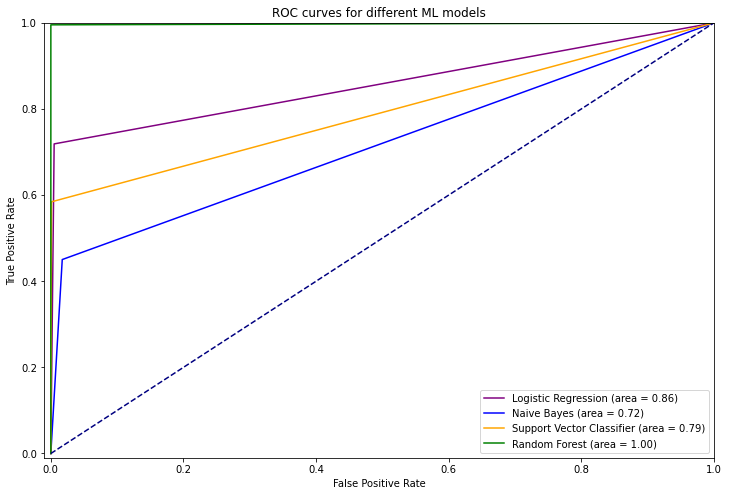

In [49]:
plt.figure(figsize=(12, 8))

plt.plot(fpr_logistic, tpr_logistic, color = 'purple', 
         label = 'Logistic Regression (area = %0.2f)' % AUC_logistic)

plt.plot(fpr_gnb, tpr_gnb, color = 'blue', 
         label = 'Naive Bayes (area = %0.2f)' % AUC_gnb)

plt.plot(fpr_svc, tpr_svc, color = 'orange', 
         label = 'Support Vector Classifier (area = %0.2f)' % AUC_svc)

plt.plot(fpr_rf, tpr_rf, color = 'green', 
         label = 'Random Forest (area = %0.2f)' % AUC_rf)

plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')

plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curves for different ML models')
plt.legend(loc = 'lower right')